# Project 1: Standardized Test Analysis

---

## Problem Statement

Given that one of the Key Performance Indicator (KPI) of the College Board is to improve participation rates of standardized tests. I will be examining recent trends made by the 2018-19 SAT & ACT cohorts to find out which state(s) should the College Board focus their effort and resources on in order to improve SAT participation rates and also taking note that the increase in participation rate should not drastically decrease overall college acceptance rate.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#ACT-(2018-2019)-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources:
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Data

Data Sources:

* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

## Library Import

---

Main libraries to be used: Numpy, Pandas, Scipy, Matplotlib, Seaborn & Bokeh

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure,show
from bokeh.models import HoverTool

In [2]:
# Set the graph style
sns.set_style('whitegrid')

## ACT (2018-2019) Data Import and Cleaning

---

Datasets to be read: 
 
ACT - `act_2018.csv` , `act_2019.csv`

In [3]:
# import csv files
act2018 = pd.read_csv('../data/act_2018.csv')
act2019 = pd.read_csv('../data/act_2019.csv')

# viewing first 5 rows of each dataframe
display(act2018.head())
display(act2019.head())
print('')

# summary of each dataframe
display(act2018.info())
print('')
display(act2019.info())

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


None

#### First impressions of ACT datasets:

- Both datasets contain 52 rows and there are no missing values
- `Participation` for both datasets belong to the `object` type. As this data is quantitative in nature, it should be converted to a `float` type
- There are officially 50 [states](https://www.50states.com/) in the United States. Hence, to check for duplicated states in dataset. If there are no duplicated states, then check if dataset contains unofficial states (i.e. 'District of Columbia' & 'Puerto Rico')
- For ACT, given that the [total composite score](https://act.edu.sg/sat-vs-act/?utm_source=google&utm_medium=cpc&utm_campaign=ACT-generic-tCPA&utm_keyword=act%20vs%20sat&matchtype=p&device=c&adposition=&adgroupid=112386874221&gclid=Cj0KCQiAnaeNBhCUARIsABEee8W5WUYpSWFVevfix_0p4WYTl0AGZ-4bZVIueNIjIv5HV6U-h_jF4foaAvwgEALw_wcB) (out of 36) is the average of the four section scores (English, Math, Reading, Science), checks should be done to ensure that the composite scores in the data provided are within this range

### Check for duplicated values and any obvious issues with the observations

In [4]:
# to find out which states are being duplicated
duplicated_states_2018 = act2018[act2018.duplicated('State')]
print("duplicated states in ACT 2018 are:", duplicated_states_2018, sep='\n')
print('')
duplicated_states_2019 = act2019[act2019.duplicated('State')]
print("duplicated states in ACT 2019 are:", duplicated_states_2019, sep='\n')

duplicated states in ACT 2018 are:
    State Participation  Composite
20  Maine            7%       24.0

duplicated states in ACT 2019 are:
Empty DataFrame
Columns: [State, Participation, Composite]
Index: []


In [5]:
# to drop the duplicated row in ACT 2018
act2018.drop_duplicates(keep ='first', inplace = True)

# see new summary of ACT 2018 daataframe
act2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [6]:
# find out if dataset contains unofficial states (total official = 50)
state_listing_act2018 = list(act2018['State'].str.lower())
for state in state_listing_act2018:
    if state == 'district of columbia':
        print('DC is present')
    if state == 'puerto rico':
        print('PR is present')

state_listing_act2019 = list(act2019['State'].str.lower())
for state in state_listing_act2019:
    if state == 'district of columbia':
        print('DC is present')
    if state == 'puerto rico':
        print('PR is present')
        
# since ACT 2018 & 2019 contains 'district of columbia', find out its index
display(act2018[act2018['State'].str.lower()=='district of columbia'])
display(act2019[act2019['State'].str.lower()=='district of columbia'])

# drop unofficial state from ACT 2018 based on index found above
# to introduce a new df name called "_cleaned"
act2018_cleaned = act2018.drop(8)
act2019_cleaned = act2019.drop(8)

# view first 10 rows and summary to ensure accuracy of cleaned dataframe
display(act2018_cleaned.head())
display(act2018_cleaned.describe())
act2018_cleaned.info()
display(act2019_cleaned.head())
display(act2019_cleaned.describe())
act2019_cleaned.info()

DC is present
DC is present


,State,Participation,Composite
8,District of columbia,32%,23.6


,State,Participation,Composite
8,District of Columbia,32%,23.5


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


,Composite
count,50.000000
mean,21.454000
std,2.111312
min,17.700000
25%,19.925000
50%,21.050000
75%,23.650000
max,25.600000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     object 
 2   Composite      50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


,Composite
count,51.000000
mean,21.409804
std,2.177545
min,17.900000
25%,19.800000
50%,20.800000
75%,23.700000
max,25.500000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


Further observation(s):
    
   - `max` composite score for both ACT 2018 and 2019 did not exceed the total scoring of 36. Hence, safe to assume no inappropriate scores present in the data

---

At this point, after removing duplicates and unofficial states in the U.S, `ACT 2019` dataframe still shows an extra row. 
Further analysis needs to be done to find out what the extra row is.



In [7]:
# finding out the extra row in ACT 2019
extra_row = pd.merge(act2019_cleaned,act2018_cleaned,left_on='State',right_on='State',how='outer')
extra_row[extra_row.isnull().any(axis = 1)]


,State,Participation_x,Composite_x,Participation_y,Composite_y
50,National,52%,20.7,NaN,NaN


In [8]:
# remove extra row in ACT2019_cleaned
display(act2019_cleaned[act2019_cleaned['State'].str.lower() == 'national'])
act2019_cleaned = act2019_cleaned.drop(51)


,State,Participation,Composite
51,National,52%,20.7


In [9]:
# display data types of each feature
display(act2018_cleaned.info())
display(act2019_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     object 
 2   Composite      50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     object 
 2   Composite      50 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


None

### Fix any incorrect data types

In [10]:
# convert participation fron obj to float64
act2018_cleaned['Participation'] = act2018_cleaned['Participation'].map(lambda i: ((float(i.replace('%','')))/100))
act2019_cleaned['Participation'] = act2019_cleaned['Participation'].map(lambda i: ((float(i.replace('%','')))/100))


In [11]:
# ensure that data types have been converted correctly
display(act2018_cleaned.info())
display(act2019_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     float64
 2   Composite      50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          50 non-null     object 
 1   Participation  50 non-null     float64
 2   Composite      50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


None

### Rename Columns

In [12]:
# renaming columns for ACT 2018 cleaned dataframe
act2018_cleaned.rename(columns = {
    'State': 'state',
    'Participation': 'act_participation',
    'Composite': 'act_composite'
}, inplace = True)

# renaming columns for ACT 2019 cleaned dataframe
act2019_cleaned.rename(columns = {
    'State': 'state',
    'Participation': 'act_participation',
    'Composite': 'act_composite'
}, inplace = True)

### Merge ACT datasets (2018-19)

In [13]:
# Merge cleaned datasets from act2018 and act 2019
act18_19 = pd.merge(act2018_cleaned,act2019_cleaned,left_on='state',right_on='state',how='outer',\
                   suffixes =('_2018','_2019'))


# sample testing to ensure merging has been done completely and accurately
display(act18_19.loc[[1,16,24,35,47]])
test_act18 = act2018_cleaned.reset_index(drop=True)
display(test_act18.loc[[1,16,24,35,47]])
test_act19 = act2019_cleaned.reset_index(drop=True)
display(test_act19.loc[[1,16,24,35,47]])

,state,act_participation_2018,act_composite_2018,act_participation_2019,act_composite_2019
1,Alaska,0.33,20.8,0.38,20.1
16,Kentucky,1.00,20.2,1.00,19.8
24,Missouri,1.00,20.0,0.82,20.8
35,Oklahoma,1.00,19.3,1.00,18.9
47,West Virginia,0.65,20.3,0.49,20.8


,state,act_participation,act_composite
1,Alaska,0.33,20.8
16,Kentucky,1.00,20.2
24,Missouri,1.00,20.0
35,Oklahoma,1.00,19.3
47,West Virginia,0.65,20.3


,state,act_participation,act_composite
1,Alaska,0.38,20.1
16,Kentucky,1.00,19.8
24,Missouri,0.82,20.8
35,Oklahoma,1.00,18.9
47,West Virginia,0.49,20.8


## SAT (2018-2019) Data Import and Cleaning

---

Datasets to be read: 
 
SAT - `sat_2018.csv` , `sat_2019.csv`

In [56]:
# import csv files
sat2018 = pd.read_csv('../data/sat_2018.csv')
sat2019 = pd.read_csv('../data/sat_2019.csv')

# viewing first 5 rows of each dataframe
display(sat2018.head())
display(sat2019.head(10))
print('')

# summary of each dataframe
display(sat2018.info())
print('')
display(sat2019.info())

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065
5,Colorado,100%,518,506,1024
6,Connecticut,100%,529,516,1046
7,Delaware,100%,499,486,985
8,District of Columbia,94%,495,480,975
9,Florida,100%,516,483,999



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


None

#### First impressions of SAT datasets:

- Both datasets contain 52 rows and there are no missing values
- `Participation` for both datasets belong to the `object` type. As this data is quantitative in nature, it should be converted to a `float` type
- There are officially 50 [states](https://www.50states.com/) in the United States. Hence, to check for duplicated states in dataset. If there are no duplicated states, then check if dataset contains unofficial states (i.e. 'District of Columbia' & 'Puerto Rico')
- For SAT, given that the [total score](https://act.edu.sg/sat-vs-act/?utm_source=google&utm_medium=cpc&utm_campaign=ACT-generic-tCPA&utm_keyword=act%20vs%20sat&matchtype=p&device=c&adposition=&adgroupid=112386874221&gclid=Cj0KCQiAnaeNBhCUARIsABEee8W5WUYpSWFVevfix_0p4WYTl0AGZ-4bZVIueNIjIv5HV6U-h_jF4foaAvwgEALw_wcB) (out of 1600) is the average all section scores (Reading + Writing and Math sections), checks should be done to ensure that the total scores in the data provided are within this range

### Check for duplicated values and any obvious issues with the observations

In [15]:
# to find out which states are being duplicated
duplicated_states_2018_sat = sat2018[sat2018.duplicated('State')]
print("duplicated states in SAT 2018 are:", duplicated_states_2018_sat, sep='\n')
print('')
duplicated_states_2019_sat = sat2019[sat2019.duplicated('State')]
print("duplicated states in ACT 2019 are:", duplicated_states_2019_sat, sep='\n')

duplicated states in SAT 2018 are:
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

duplicated states in ACT 2019 are:
Empty DataFrame
Columns: [State, Participation Rate, EBRW, Math, Total]
Index: []


Observation(s):
    
   - There were no duplicated `States` found in both SAT 2018 and 2019 datasets.

In [16]:
# find out if dataset contains unofficial states / "National" (total official = 50)
state_listing_sat2018 = list(sat2018['State'].str.lower())
for state in state_listing_sat2018:
    if state == 'district of columbia':
        print('DC is present')
    if state == 'puerto rico':
        print('PR is present')
    if state == 'national':
        print('NT is present')

state_listing_sat2019 = list(sat2019['State'].str.lower())
for state in state_listing_sat2019:
    if state == 'district of columbia':
        print('DC is present')
    if state == 'puerto rico':
        print('PR is present')
    if state == 'national':
        print('NT is present')
        
# Drop unofficial states found above and introduce a new df name
display(sat2018[sat2018['State'].str.lower()=='district of columbia'])
display(sat2019[sat2019['State'].str.lower()=='district of columbia'])
display(sat2019[sat2019['State'].str.lower()=='puerto rico'])
sat2018_cleaned = sat2018.drop(8)
sat2019_cleaned = sat2019.drop([8,39])

# view first 10 rows and summary to ensure accuracy of cleaned dataframe
display(sat2018_cleaned.head())
display(sat2018_cleaned.describe())
sat2018_cleaned.info()
display(sat2019_cleaned.head())
display(sat2019_cleaned.describe())
sat2019_cleaned.info()

DC is present
DC is present
PR is present


,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,92%,497,480,977


,State,Participation Rate,EBRW,Math,Total
8,District of Columbia,94%,495,480,975


,State,Participation Rate,EBRW,Math,Total
39,Puerto Rico,—,483,462,944


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


,Evidence-Based Reading and Writing,Math,Total
count,50.000000,50.000000,50.000000
mean,565.020000,557.760000,1122.880000
std,47.010416,46.987432,92.845634
min,480.000000,486.000000,998.000000
25%,535.000000,524.250000,1062.250000
50%,552.000000,545.500000,1098.500000
75%,612.750000,594.250000,1207.000000
max,643.000000,655.000000,1298.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               50 non-null     object
 1   Participation                       50 non-null     object
 2   Evidence-Based Reading and Writing  50 non-null     int64 
 3   Math                                50 non-null     int64 
 4   Total                               50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ KB


,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


,EBRW,Math,Total
count,51.000000,51.000000,51.000000
mean,560.705882,551.509804,1112.294118
std,46.395385,52.495856,98.487216
min,483.000000,445.000000,935.000000
25%,527.500000,511.500000,1038.000000
50%,550.000000,546.000000,1097.000000
75%,612.000000,599.000000,1210.000000
max,636.000000,648.000000,1284.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


### Fix any incorrect data types

In [17]:
# convert participation fron obj to float64
sat2018_cleaned['Participation'] = sat2018_cleaned['Participation'].map(lambda i: ((float(i.replace('%','')))/100))


Observation(s):
    
   - Unable to convert `Participation Rate` from `Object` to `float64` due to : `ValueError: could not convert string to float: '—'`
   - To check stat with '-' participation rate and drop if necessary.

In [18]:
sat2019_cleaned[sat2019_cleaned['Participation Rate'] == '—']

,State,Participation Rate,EBRW,Math,Total
47,Virgin Islands,—,490,445,935


Observation(s):
    
   - Virgin Islands is an [unincorporated](https://www.uvi.edu/administration/about-uvi/us-virgin-islands.aspx) U.S Territory
   - To drop row

In [19]:
# drop Virgin Islands row 
sat2019_cleaned = sat2019_cleaned.drop(47)

In [20]:
# convert participation from obj to float64 for SAT 2019
sat2019_cleaned['Participation Rate'] = sat2019_cleaned['Participation Rate'].map(lambda i: ((float(i.replace('%','')))/100))

In [21]:
# ensure that data types have been converted correctly
display(sat2018_cleaned.info())
display(sat2019_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               50 non-null     object 
 1   Participation                       50 non-null     float64
 2   Evidence-Based Reading and Writing  50 non-null     int64  
 3   Math                                50 non-null     int64  
 4   Total                               50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               50 non-null     object 
 1   Participation Rate  50 non-null     float64
 2   EBRW                50 non-null     int64  
 3   Math                50 non-null     int64  
 4   Total               50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.3+ KB


None

In [22]:
# to verify validity of SAT scores
# EBRW max score: 800
# Math max score: 800
# Total max score: 1600
display(sat2018_cleaned.describe().T)
display(sat2019_cleaned.describe().T)

,count,mean,std,min,25%,50%,75%,max
Participation,50.0,0.4482,0.370976,0.02,0.0425,0.5,0.745,1.0
Evidence-Based Reading and Writing,50.0,565.0200,47.010416,480.00,535.0000,552.0,612.750,643.0
Math,50.0,557.7600,46.987432,486.00,524.2500,545.5,594.250,655.0
Total,50.0,1122.8800,92.845634,998.00,1062.2500,1098.5,1207.000,1298.0


,count,mean,std,min,25%,50%,75%,max
Participation Rate,50.0,0.4816,0.386002,0.02,0.0525,0.525,0.8175,1.0
EBRW,50.0,562.1200,45.742688,483.00,529.5000,552.000,613.0000,636.0
Math,50.0,553.6400,50.753409,460.00,516.7500,546.000,600.5000,648.0
Total,50.0,1115.8400,96.142403,943.00,1049.0000,1098.500,1215.0000,1284.0


### Rename Columns

In [23]:
# renaming columns for SAT 2018 cleaned dataframe
sat2018_cleaned.rename(columns = {
    'State': 'state',
    'Participation': 'sat_participation',
    'Evidence-Based Reading and Writing': 'sat_ebrw',
    'Math': 'sat_math',
    'Total': 'sat_total'
}, inplace = True)

# renaming columns for SAT 2019 cleaned dataframe
sat2019_cleaned.rename(columns = {
    'State': 'state',
    'Participation Rate': 'sat_participation',
    'EBRW': 'sat_ebrw',
    'Math': 'sat_math',
    'Total': 'sat_total'
}, inplace = True)

### Merge SAT datasets (2018-19)

In [24]:
# Merge cleaned datasets from sat2018 and sat2019
sat2018_cleaned = sat2018_cleaned.sort_values(by=['state'])
sat18_19 = pd.merge(sat2018_cleaned,sat2019_cleaned,left_on='state',right_on='state',how='outer',\
                   suffixes =('_2018','_2019'))


# sample testing to ensure merging has been done completely and accurately
display(sat18_19.loc[[1,16,24,35,47]])
test_sat18 = sat2018_cleaned.reset_index(drop=True)
display(test_sat18.loc[[1,16,24,35,47]])
test_sat19 = sat2019_cleaned.reset_index(drop=True)
display(test_sat19.loc[[1,16,24,35,47]])

,state,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019
1,Alaska,0.43,562,544,1106,0.41,556,541,1097
16,Kentucky,0.04,630,618,1248,0.04,620,612,1232
24,Missouri,0.04,633,629,1262,0.04,622,615,1236
35,Oklahoma,0.08,541,521,1062,0.22,490,472,963
47,West Virginia,0.28,513,486,999,0.99,483,460,943


,state,sat_participation,sat_ebrw,sat_math,sat_total
1,Alaska,0.43,562,544,1106
16,Kentucky,0.04,630,618,1248
24,Missouri,0.04,633,629,1262
35,Oklahoma,0.08,541,521,1062
47,West Virginia,0.28,513,486,999


,state,sat_participation,sat_ebrw,sat_math,sat_total
1,Alaska,0.41,556,541,1097
16,Kentucky,0.04,620,612,1232
24,Missouri,0.04,622,615,1236
35,Oklahoma,0.22,490,472,963
47,West Virginia,0.99,483,460,943


### Merge ACT & SAT datasets (2018-19) into a final DataFrame

In [25]:
# Merge cleaned datasets from sat2018 and sat2019
final_df = pd.merge(act18_19,sat18_19,left_on='state',right_on='state',how='outer',\
                   suffixes =('',''))

In [26]:
final_df.head(10)

,state,act_participation_2018,act_composite_2018,act_participation_2019,act_composite_2019,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,sat_participation_2019,sat_ebrw_2019,sat_math_2019,sat_total_2019
0,Alabama,1.00,19.1,1.00,18.9,0.06,595,571,1166,0.07,583,560,1143
1,Alaska,0.33,20.8,0.38,20.1,0.43,562,544,1106,0.41,556,541,1097
2,Arizona,0.66,19.2,0.73,19.0,0.29,577,572,1149,0.31,569,565,1134
3,Arkansas,1.00,19.4,1.00,19.3,0.05,592,576,1169,0.06,582,559,1141
4,California,0.27,22.7,0.23,22.6,0.60,540,536,1076,0.63,534,531,1065
5,Colorado,0.30,23.9,0.27,23.8,1.00,519,506,1025,1.00,518,506,1024
6,Connecticut,0.26,25.6,0.22,25.5,1.00,535,519,1053,1.00,529,516,1046
7,Delaware,0.17,23.8,0.13,24.1,1.00,505,492,998,1.00,499,486,985
8,Florida,0.66,19.9,0.54,20.1,0.56,550,549,1099,1.00,516,483,999
9,Georgia,0.53,21.4,0.49,21.4,0.70,542,522,1064,0.71,538,519,1058


### Data Dictionary

Dataframe : `final_df`

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|State names for 50 states in the US| 
|act_participation_2018|float|ACT|State participation rate for ACT in 2018| 
|act_composite_2018|float|ACT|State mean composite score in 2018| 
|act_participation_2019|float|ACT|State participation rate for ACT in 2019| 
|act_composite_2019|float|ACT|State mean composite score in 2019| 
|sat_participation_2018|float|SAT|State participation rate for SAT in 2018| 
|sat_ebrw_2018|int|SAT|State mean score for Evidence-Based Reading and Writing (EBRW) in 2018| 
|sat_math_2018|int|SAT|State mean score for Math in 2018|
|sat_total_2018|int|SAT|State mean total score in 2018| 
|sat_participation_2019|float|SAT|State participation rata for SAT in 2019| 
|sat_ebrw_2019|int|SAT|State mean score for Evidence-Based Reading and Writing (EBRW) in 2019| 
|sat_math_2019|int|SAT|State mean score for Math in 2019| 
|sat_total_2019|int|SAT|State mean total score in 2019|



## Exploratory Data Analysis

---

### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [27]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2018,50.0,0.6232,0.341141,0.07,0.2775,0.660,1.0000,1.0
act_composite_2018,50.0,21.4540,2.111312,17.70,19.9250,21.050,23.6500,25.6
act_participation_2019,50.0,0.5920,0.346534,0.06,0.2425,0.585,1.0000,1.0
act_composite_2019,50.0,21.4240,2.197267,17.90,19.8000,20.950,23.7500,25.5
sat_participation_2018,50.0,0.4482,0.370976,0.02,0.0425,0.500,0.7450,1.0
sat_ebrw_2018,50.0,565.0200,47.010416,480.00,535.0000,552.000,612.7500,643.0
sat_math_2018,50.0,557.7600,46.987432,486.00,524.2500,545.500,594.2500,655.0
sat_total_2018,50.0,1122.8800,92.845634,998.00,1062.2500,1098.500,1207.0000,1298.0
sat_participation_2019,50.0,0.4816,0.386002,0.02,0.0525,0.525,0.8175,1.0
sat_ebrw_2019,50.0,562.1200,45.742688,483.00,529.5000,552.000,613.0000,636.0


### Manually calculate standard deviation:

Formula for standard deviation:

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

In [28]:
def mean_calculate(lst):
    mean = sum(lst) / len(lst)
    return mean

def std_dev_calculate(lst): 
    std_dev = round(((sum(list(map(lambda value:\
                            ((value - mean_calculate(lst))**2),lst))) / len(lst))**0.5),4)
    return std_dev

In [29]:
# manually calculate standard deviation for columns of final dataframe

std = {x: std_dev_calculate(final_df[x]) for x in final_df.columns if final_df[x].dtypes != 'O' }
std

{'act_participation_2018': 0.3377,
 'act_composite_2018': 2.0901,
 'act_participation_2019': 0.3431,
 'act_composite_2019': 2.1752,
 'sat_participation_2018': 0.3672,
 'sat_ebrw_2018': 46.5379,
 'sat_math_2018': 46.5152,
 'sat_total_2018': 91.9125,
 'sat_participation_2019': 0.3821,
 'sat_ebrw_2019': 45.283,
 'sat_math_2019': 50.2433,
 'sat_total_2019': 95.1761}

Observation(s):
    
  - When manually calculating the `Standard Deviation` of each column, it was noted that the stds were different compared to Pandas' std. 
  - Upon further analysis, if we use the `sample std formula` ( i.e. n-1 ) when manually calculating, this would result in the same std values as per pandas' `describe()`.
  - Hence, we can conclude that std calculated via Pandas would be based on the `Sample` population instead of total population.
  - BONUS: when calculating std using `np.std()`, it was noted that `Total` population was used instead of sample population. 

### Investigate trends in the data

#### First Observation:

- When viewing the 5 highest and lowest participation rates for both SAT and ACT in 2018 and 2019, we can see a trend that when States have higher participation rates, the total mean score/composite decreases, vice versa.

- For ACT, the states with lowest participation rates in 2018 were Maine (7%), Rhode Island (15%), New Hampshire (16%) and Delaware (17%). In 2019, the states with lowest participation rates were Maine (6%), Rhode Island (12%), Delaware (13%) and New Hampshire (14%). It can be observed that participation rates for ACT had generally declined with lower lows.

- For SAT, the states with lowest participation rates in both 2018 and 2019 were North Dakota (2%), Iowa (3%), Mississippi (3%) and Nebraska (3%).

- It seems that more states are participating in ACT rather than SAT for both years, although there were generally slight decreases in ACT for the bottom few states.

In [30]:
# states with highest participation rates (ACT)
display(final_df[['state','act_participation_2018','act_composite_2018']].sort_values(by = ['act_participation_2018','state'], ascending = [False,True]).head())
display(final_df[['state','act_participation_2019','act_composite_2019']].sort_values(by = ['act_participation_2019','state'], ascending = [False,True]).head())

# states with lowest participation rates (ACT)
display(final_df[['state','act_participation_2018','act_composite_2018']].sort_values(by = ['act_participation_2018','state'], ascending = [True,True]).head())
display(final_df[['state','act_participation_2019','act_composite_2019']].sort_values(by = ['act_participation_2019','state'], ascending = [True,True]).head())

,state,act_participation_2018,act_composite_2018
0,Alabama,1.0,19.1
3,Arkansas,1.0,19.4
16,Kentucky,1.0,20.2
17,Louisiana,1.0,19.2
23,Mississippi,1.0,18.6


,state,act_participation_2019,act_composite_2019
0,Alabama,1.0,18.9
3,Arkansas,1.0,19.3
16,Kentucky,1.0,19.8
17,Louisiana,1.0,18.8
23,Mississippi,1.0,18.4


,state,act_participation_2018,act_composite_2018
18,Maine,0.07,24.0
38,Rhode Island,0.15,24.2
28,New Hampshire,0.16,25.1
7,Delaware,0.17,23.8
37,Pennsylvania,0.20,23.5


,state,act_participation_2019,act_composite_2019
18,Maine,0.06,24.3
38,Rhode Island,0.12,24.7
7,Delaware,0.13,24.1
28,New Hampshire,0.14,25.0
37,Pennsylvania,0.17,23.6


In [31]:
# states with highest participation rates (SAT)
display(final_df[['state','sat_participation_2018','sat_total_2018']].sort_values(by = ['sat_participation_2018','state'], ascending = [False,True]).head())
display(final_df[['state','sat_participation_2019','sat_total_2019']].sort_values(by = ['sat_participation_2019','state'], ascending = [False,True]).head())

# states with lowest participation rates (SAT)
display(final_df[['state','sat_participation_2018','sat_total_2018']].sort_values(by = ['sat_participation_2018','state'], ascending = [True,True]).head())
display(final_df[['state','sat_participation_2019','sat_total_2019']].sort_values(by = ['sat_participation_2019','state'], ascending = [True,True]).head())

,state,sat_participation_2018,sat_total_2018
5,Colorado,1.0,1025
6,Connecticut,1.0,1053
7,Delaware,1.0,998
11,Idaho,1.0,1001
21,Michigan,1.0,1011


,state,sat_participation_2019,sat_total_2019
5,Colorado,1.0,1024
6,Connecticut,1.0,1046
7,Delaware,1.0,985
8,Florida,1.0,999
11,Idaho,1.0,993


,state,sat_participation_2018,sat_total_2018
33,North Dakota,0.02,1283
14,Iowa,0.03,1265
23,Mississippi,0.03,1236
26,Nebraska,0.03,1252
40,South Dakota,0.03,1240


,state,sat_participation_2019,sat_total_2019
33,North Dakota,0.02,1263
14,Iowa,0.03,1244
23,Mississippi,0.03,1237
26,Nebraska,0.03,1260
40,South Dakota,0.03,1268


In [32]:
# states with highest mean score (ACT)
display(final_df[['state','act_participation_2018','act_composite_2018']].sort_values(by = ['act_composite_2018','state'], ascending = [False,True]).head())
display(final_df[['state','act_participation_2019','act_composite_2019']].sort_values(by = ['act_composite_2019','state'], ascending = [False,True]).head())

# states with lowest mean score (ACT)
display(final_df[['state','act_participation_2018','act_composite_2018']].sort_values(by = ['act_composite_2018','state'], ascending = [True,True]).head())
display(final_df[['state','act_participation_2019','act_composite_2019']].sort_values(by = ['act_composite_2019','state'], ascending = [True,True]).head())

,state,act_participation_2018,act_composite_2018
6,Connecticut,0.26,25.6
20,Massachusetts,0.25,25.5
28,New Hampshire,0.16,25.1
31,New York,0.27,24.5
21,Michigan,0.22,24.2


,state,act_participation_2019,act_composite_2019
6,Connecticut,0.22,25.5
20,Massachusetts,0.21,25.5
28,New Hampshire,0.14,25.0
38,Rhode Island,0.12,24.7
31,New York,0.22,24.5


,state,act_participation_2018,act_composite_2018
27,Nevada,1.00,17.7
39,South Carolina,1.00,18.3
23,Mississippi,1.00,18.6
10,Hawaii,0.89,18.9
0,Alabama,1.00,19.1


,state,act_participation_2019,act_composite_2019
27,Nevada,1.00,17.9
23,Mississippi,1.00,18.4
17,Louisiana,1.00,18.8
39,South Carolina,0.78,18.8
0,Alabama,1.00,18.9


In [33]:
# states with highest mean score (SAT)
display(final_df[['state','sat_participation_2018','sat_total_2018']].sort_values(by = ['sat_total_2018','state'], ascending = [False,True]).head())
display(final_df[['state','sat_participation_2019','sat_total_2019']].sort_values(by = ['sat_total_2019','state'], ascending = [False,True]).head())

# states with lowest mean score (SAT)
display(final_df[['state','sat_participation_2018','sat_total_2018']].sort_values(by = ['sat_total_2018','state'], ascending = [True,True]).head())
display(final_df[['state','sat_participation_2019','sat_total_2019']].sort_values(by = ['sat_total_2019','state'], ascending = [True,True]).head())

,state,sat_participation_2018,sat_total_2018
22,Minnesota,0.04,1298
48,Wisconsin,0.03,1294
33,North Dakota,0.02,1283
14,Iowa,0.03,1265
15,Kansas,0.04,1265


,state,sat_participation_2019,sat_total_2019
22,Minnesota,0.04,1284
48,Wisconsin,0.03,1283
40,South Dakota,0.03,1268
33,North Dakota,0.02,1263
26,Nebraska,0.03,1260


,state,sat_participation_2018,sat_total_2018
7,Delaware,1.00,998
47,West Virginia,0.28,999
11,Idaho,1.00,1001
10,Hawaii,0.56,1010
43,Utah,0.04,1010


,state,sat_participation_2019,sat_total_2019
47,West Virginia,0.99,943
35,Oklahoma,0.22,963
7,Delaware,1.00,985
11,Idaho,1.00,993
38,Rhode Island,1.00,995


#### Second Observation:

- For ACT, participation rate change yoy for South Carolina (-22%) was the greatest followed by Missouri (-18%), West Virginia (-16%) and then Florida (-12%).
- For SAT, the greatest was West Virginia (71%) followed by Florida (44%), Oklahoma (14%) and then South Carolina (13%). 
- Research would need to be done on West Virginia on being top and bottom 5 biggest mover. [(Outside Research)](#Outside-Research)
- Research would need to be done on South Carolina and Missouri on reasons why the ACT participation rate had decreased from a 100%. [(Outside Research)](#Outside-Research)


In [34]:
# create a new column calculating participation rate change y-o-y
final_df['actpart_change_yoy'] = final_df['act_participation_2019'] - final_df['act_participation_2018']
final_df['satpart_change_yoy'] = final_df['sat_participation_2019'] - final_df['sat_participation_2018']

In [35]:
# creating dataframe looking at only participation rates and y-o-y rate change
final_df_part = final_df\
[['state','act_participation_2018','act_participation_2019','actpart_change_yoy','sat_participation_2018',\
 'sat_participation_2019','satpart_change_yoy']] 


In [36]:
# finding out top and bottom 5 movers for participation rate change (ACT)
display(final_df_part[['state','act_participation_2018','act_participation_2019','actpart_change_yoy']].sort_values(by = 'actpart_change_yoy', ascending = True).head())
final_df_part[['state','act_participation_2018','act_participation_2019','actpart_change_yoy']].sort_values(by = 'actpart_change_yoy', ascending = False).head()

,state,act_participation_2018,act_participation_2019,actpart_change_yoy
39,South Carolina,1.00,0.78,-0.22
24,Missouri,1.00,0.82,-0.18
47,West Virginia,0.65,0.49,-0.16
8,Florida,0.66,0.54,-0.12
10,Hawaii,0.89,0.80,-0.09


,state,act_participation_2018,act_participation_2019,actpart_change_yoy
2,Arizona,0.66,0.73,0.07
1,Alaska,0.33,0.38,0.05
15,Kansas,0.71,0.72,0.01
0,Alabama,1.00,1.00,0.00
17,Louisiana,1.00,1.00,0.00


In [37]:
# finding out top and bottom 5 movers for participation rate change (SAT)
display(final_df_part[['state','sat_participation_2018','sat_participation_2019','satpart_change_yoy']].sort_values(by = 'satpart_change_yoy', ascending = True).head())
final_df_part[['state','sat_participation_2018','sat_participation_2019','satpart_change_yoy']].sort_values(by = 'satpart_change_yoy', ascending = False).head()

,state,sat_participation_2018,sat_participation_2019,satpart_change_yoy
27,Nevada,0.23,0.20,-0.03
1,Alaska,0.43,0.41,-0.02
10,Hawaii,0.56,0.54,-0.02
25,Montana,0.10,0.09,-0.01
32,North Carolina,0.52,0.51,-0.01


,state,sat_participation_2018,sat_participation_2019,satpart_change_yoy
47,West Virginia,0.28,0.99,0.71
8,Florida,0.56,1.00,0.44
35,Oklahoma,0.08,0.22,0.14
39,South Carolina,0.55,0.68,0.13
19,Maryland,0.76,0.82,0.06


In [38]:
# states with > 50% participation for both tests in 2018
display(final_df_part[(final_df_part['act_participation_2018']>0.50) & (final_df_part['sat_participation_2018']>0.50)]\
    [['state','act_participation_2018','sat_participation_2018']])
# states with > 50% participation for both tests in 2019
display(final_df_part[(final_df_part['act_participation_2019']>0.50) & (final_df_part['sat_participation_2019']>0.50)]\
    [['state','act_participation_2019','sat_participation_2019']])

,state,act_participation_2018,sat_participation_2018
8,Florida,0.66,0.56
9,Georgia,0.53,0.70
10,Hawaii,0.89,0.56
32,North Carolina,1.00,0.52
39,South Carolina,1.00,0.55


,state,act_participation_2019,sat_participation_2019
8,Florida,0.54,1.00
10,Hawaii,0.80,0.54
32,North Carolina,1.00,0.51
39,South Carolina,0.78,0.68


#### Third Observation:
Additional question: 
`Any states with participation rates between 90% - 99% for either one of the tests in 2018-2019?`

- For ACT, the states were Minnesota and North Dakota.
- For SAT, the states were Maine and New Hampshire.

 

**Question to consider based on above findings:**
   - Would it be easier for the College Board to push these states to achieve 100% SAT participation rate? [(Outside Research)](#Outside-Research)

In [39]:
# diplay all states with particiation rates between 0.9 and 0.99 for SAT and ACT in 2018-19: 

display(final_df_part[(final_df_part['act_participation_2018'].between(0.9,0.99)) & (final_df_part['act_participation_2019'].between(0.9,0.99))]\
    [['state','act_participation_2018','act_participation_2019']])
display(final_df_part[(final_df_part['sat_participation_2018'].between(0.9,0.99)) & (final_df_part['sat_participation_2019'].between(0.9,0.99))]\
    [['state','sat_participation_2018','sat_participation_2019']])

,state,act_participation_2018,act_participation_2019
22,Minnesota,0.99,0.95
33,North Dakota,0.98,0.96


,state,sat_participation_2018,sat_participation_2019
18,Maine,0.99,0.99
28,New Hampshire,0.96,0.95


## Visualize the Data

---

### Heatmap

Relationships observed:
- Participation rates and total mean score / composite have a strong negative correlation (i.e. the higher the participation rate for standadized tests, the lower the total score will be)
- Participation rates in SAT and that of ACT have a strong negative correlation (i.e. if students are taking one test, it is highly likely that they will not take the other standardized test)
- ACT composite scores in 2018 and that of 2019 have a strong positive correlation while SAT total scores in 2018 and that of 2019 have a strong positive correlation (i.e. test scores in totality remain largely similar between 2018 and 2019)

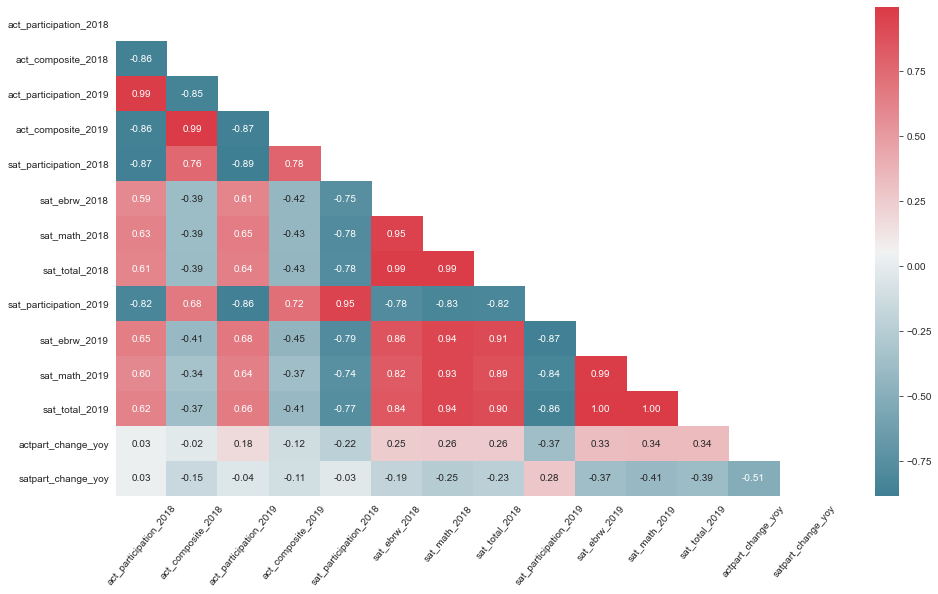

In [40]:
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables. i.e. relationship between the 2 variables.
corr = final_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, mask = mask, cmap=colorsintheheatmap, annot=True, fmt=".2f")


plt.xticks(rotation = 50)
plt.show()



### Histogram

`We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.`

We mainly observe a bimodal distribution for histograms of both the participation rates and mean scores despite a sample size of n > 30 which should have given us a normal distribution under the Central Limit Theorem (CLT).

For the histrograms of participation rates, we observed two peaks. For the ACT histogram, one of the peak is at the 100% range while the other is around an average of 25%. This would tell us that there may be 2 groups of participants; where 100% rate group could be states that made ACT mandatory. Similarly for the SAT histogram, one of the peak is at the 0% range, indicating that this group could belong to the states that made ACT mandatory and not the SAT. However, it is noted that the other peak (the lower peak) for SAT participation rates is at the 100% range. Which may indicate that there are a group of states that could have made SAT mandatory instead. This group has also grown in % from 2018 to 2019, indicating that more states are making SAT mandatory over ACT.

For the histograms of mean scores, we observed two peaks. Exam scores tend to be normally distributed with a single peak. However, grades sometimes fall into a bimodal distribution with a lot of students getting A grades and a lot getting F grades. This can tell you that you are looking at two different groups of students. It could be that one group is underprepared for the class while other group may have overprepared. This may also be translated as one group being motivated to take the exams while the other group may be unmotivated to take the exams if the exams are deemed mandatory by the states.

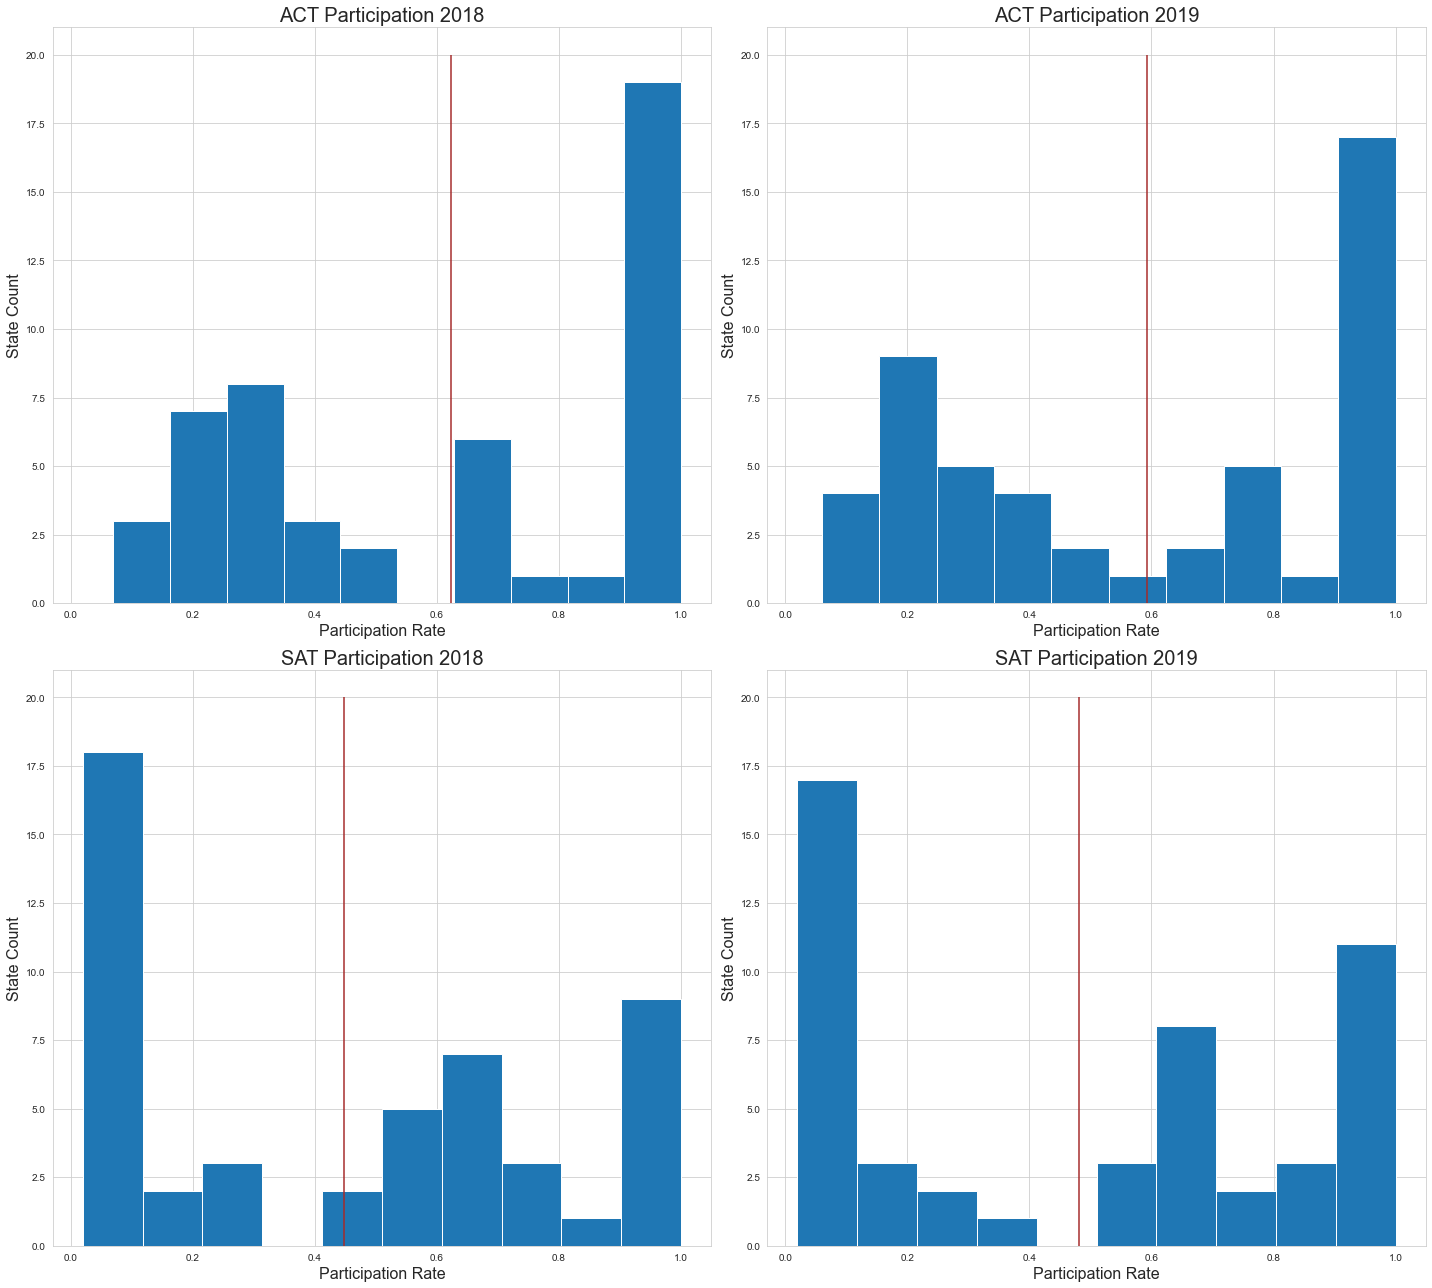

In [42]:
# Histograms of SAT and ACT participation in 2018 and 2019
# Establish figure size.
plt.figure(figsize = (20,18))

# Plot for ACT participation 2018
par1 = plt.subplot(2,2,1)
par1.hist(final_df['act_participation_2018'])
par1.vlines(x = np.mean(final_df['act_participation_2018']), ymin = 0, ymax = 20, color = 'brown')
par1.set_title('ACT Participation 2018', size =20)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('State Count', size = 16)

# plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.
# Plot for ACT participation 2019
par2 = plt.subplot(2,2,2, sharex = par1)
par2.hist(final_df['act_participation_2019'])
par2.vlines(x = np.mean(final_df['act_participation_2019']), ymin = 0, ymax = 20, color = 'brown')
par2.set_title('ACT Participation 2019', size =20)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('State Count', size = 16)

# Plot for SAT participation 2018
par3 = plt.subplot(2,2,3, sharex = par2)
par3.hist(final_df['sat_participation_2018'])
par3.vlines(x = np.mean(final_df['sat_participation_2018']), ymin = 0, ymax = 20, color = 'brown')
par3.set_title('SAT Participation 2018', size =20)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('State Count', size = 16)

# Plot for SAT participation 2019
par4 = plt.subplot(2,2,4, sharex = par3)
par4.hist(final_df['sat_participation_2019'])
par4.vlines(x = np.mean(final_df['sat_participation_2019']), ymin = 0, ymax = 20, color = 'brown')
par4.set_title('SAT Participation 2019', size =20)
plt.xlabel('Participation Rate', size = 16)
plt.ylabel('State Count', size = 16)

plt.tight_layout()


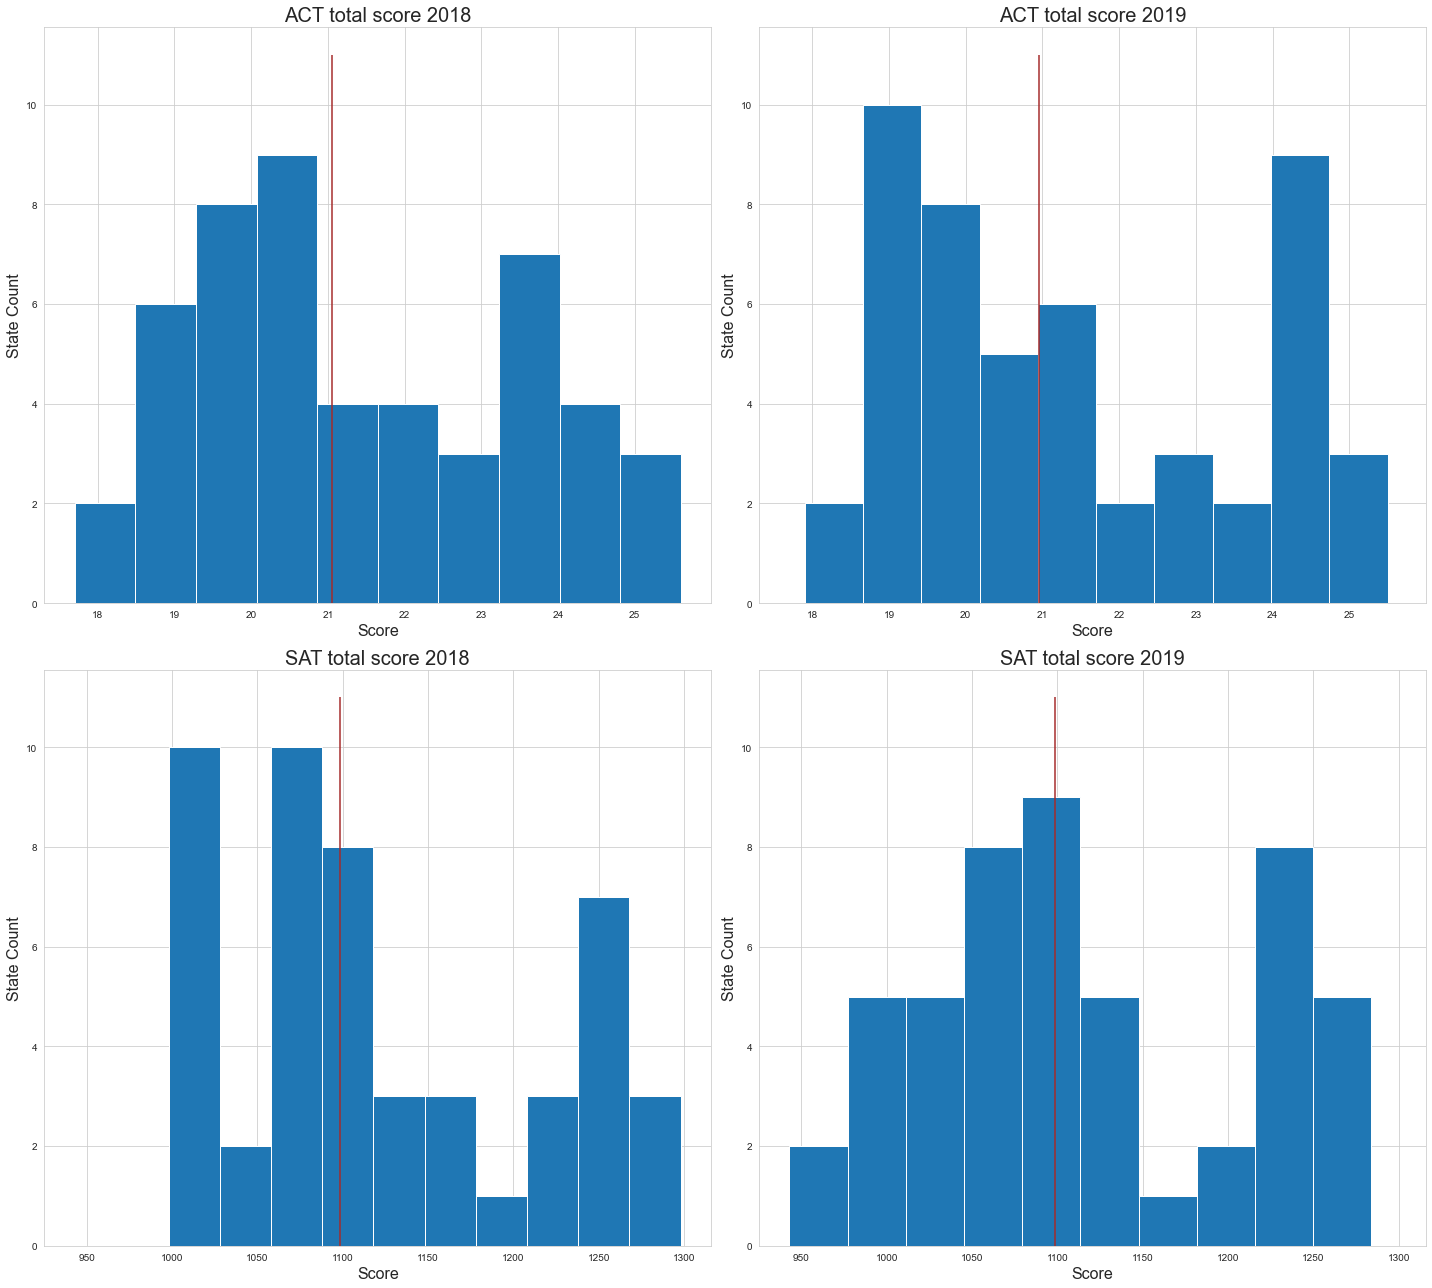

In [43]:
# Histograms of SAT and ACT scores in 2018 and 2019
# Establish figure size.
plt.figure(figsize = (20,18))

# Plot for ACT scores 2018
ax1 = plt.subplot(2,2,1)
ax1.hist(final_df['act_composite_2018'])
ax1.vlines(x = np.median(final_df['act_composite_2018']), ymin = 0, ymax = 11, color = 'brown')
ax1.set_title('ACT total score 2018', size =20)
plt.xlabel('Score', size = 16)
plt.ylabel('State Count', size = 16)
           
# plt.subplot(3, 1, 2) means we have 3 rows, 1 column, and are referencing plot 2.
# Plot for ACT scores 2019
ax2 = plt.subplot(2,2,2, sharex = ax1)
ax2.hist(final_df['act_composite_2019'])
ax2.vlines(x = np.median(final_df['act_composite_2019']), ymin = 0, ymax = 11, color = 'brown')
ax2.set_title('ACT total score 2019', size =20)
plt.xlabel('Score', size = 16)
plt.ylabel('State Count', size = 16)

# Plot for SAT scores 2018
ax3 = plt.subplot(2,2,3)
ax3.hist(final_df['sat_total_2018'])
ax3.vlines(x = np.median(final_df['sat_total_2018']), ymin = 0, ymax = 11, color = 'brown')
ax3.set_title('SAT total score 2018', size =20)
plt.xlabel('Score', size = 16)
plt.ylabel('State Count', size = 16)

# Plot for SAT scores 2019
ax4 = plt.subplot(2,2,4, sharex = ax3)
ax4.hist(final_df['sat_total_2019'])
ax4.vlines(x = np.median(final_df['sat_total_2019']), ymin = 0, ymax = 11, color = 'brown')
ax4.set_title('SAT total score 2019', size =20)
plt.xlabel('Score', size = 16)
plt.ylabel('State Count', size = 16)

plt.tight_layout()

### Boxplot

ACT seems to be more popular than SAT based on the `SAT & ACT participation (2018-19` boxplot. Where ACT participation rates (upper and lower quartile) are trending to the right while SAT participation rates (upper and lower quartile) are trending to the left. Furthermore, the medians of ACT participation for both 2018 and 2019 are higher than that of the medians for SAT participation respectively. 

It is, however, important to note that year-over-year (y-o-y) change in ACT participation has decreased while y-o-y change in SAT partipation has increased. This could indicate that more students may be choosing SAT in favour of ACT or that more schools are making SAT mandatory instead of ACT.

It is also worth noting that despite earlier observations above (EDA and heatmap), while participation rates are negatively correlated to test scores, we can see here that the **median** of `Mean Total Scores` for ACT remained largely unchanged from 2018 to 2019 with a mean score of roughly 21 points. While the **median** of `Mean Total Scores` for SAT remained largely unchanged from 2018 and  2019 as well, with a mean score of roughly 1100 points.

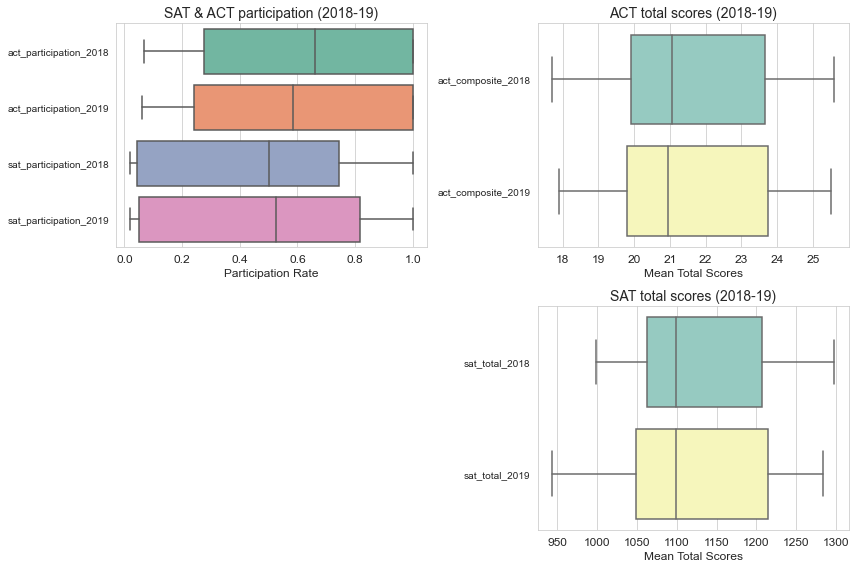

In [50]:
# plot boxplots for ACT & SAT Participation rates (2018-19)
participation_total = ['act_participation_2018','act_participation_2019','sat_participation_2018','sat_participation_2019']
act_scores_total = ['act_composite_2018', 'act_composite_2019']
sat_scores_total = ['sat_total_2018', 'sat_total_2019']
fig, ax = plt.subplots(2,2, figsize=(12, 8)) # create figure and axes


sns.boxplot(data=final_df[participation_total],ax = ax[0][0],orient='h', palette = 'Set2')
ax[0][0].set_title('SAT & ACT participation (2018-19)',fontsize=14)
plt.setp(ax[0][0].get_xticklabels(), fontsize=12)
ax[0][0].set_xlabel('Participation Rate', fontsize = 12)

# plot boxplots for ACT total scores (2018-19)
sns.boxplot(data=final_df[act_scores_total],ax = ax[0][1],orient='h', palette = 'Set3')
ax[0][1].set_title('ACT total scores (2018-19)',fontsize=14)
plt.setp(ax[0][1].get_xticklabels(), fontsize=12)
ax[0][1].set_xlabel('Mean Total Scores', fontsize = 12)

# plot boxplots for SAT total scores (2018-19)
sns.boxplot(data=final_df[sat_scores_total],ax = ax[1][1],orient='h', palette = 'Set3')
ax[1][1].set_title('SAT total scores (2018-19)',fontsize=14)
plt.setp(ax[1][1].get_xticklabels(), fontsize=12)
ax[1][1].set_xlabel('Mean Total Scores', fontsize = 12)


fig.delaxes(ax[1,0]) # remove empty subplot
plt.tight_layout()
plt.show()


### Scatterplots

Similarly to previous observations made:
1. Participation rates in SAT and that of ACT have a negative correlation 
2. Participation rates and scores have a negative correlation

However, we did notice `2 outliers` (West Virginia and Florida) when comparing relations between participation rates in 2018 and participation rates in 2019. They are outliers due to a drastic increase in SAT participation rate from 2018 to 2019.

### SAT vs. ACT participation in 2018 and 2019

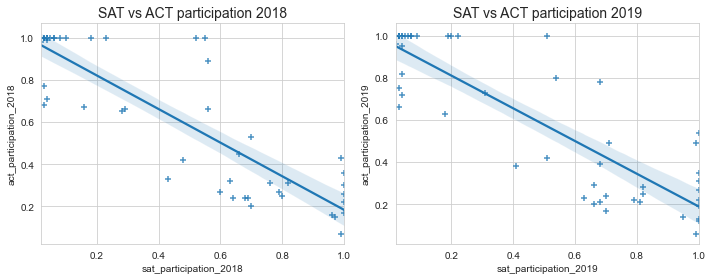

In [45]:
# Establish figure size.
plt.figure(figsize = (10,4))

# Plot for 2018
plt.subplot(1,2,1)
sns.regplot(x = 'sat_participation_2018',y= 'act_participation_2018', data=final_df, marker = '+')
plt.title('SAT vs ACT participation 2018', fontsize = 14)

# Plot for 2019
plt.subplot(1,2,2)
sns.regplot(x = 'sat_participation_2019',y= 'act_participation_2019', data=final_df, marker = '+')
plt.title('SAT vs ACT participation 2019', fontsize = 14)


plt.tight_layout()
plt.show()

### Total Mean Score vs Participation in 2018 and 2019

<ipython-input-46-6e1c4eee0c2c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,2, sharex = plt.subplot(2,2,1))
<ipython-input-46-6e1c4eee0c2c>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,4, sharex = plt.subplot(2,2,3))


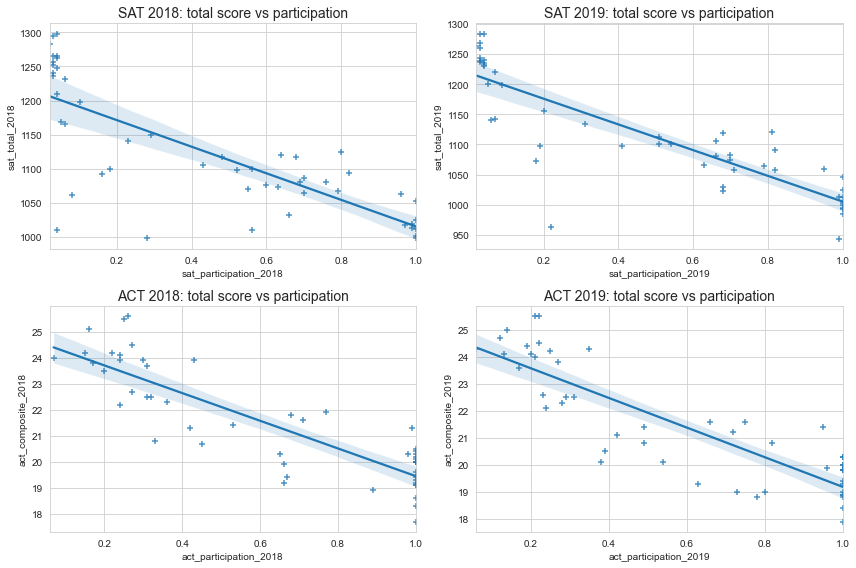

In [46]:
# Establish figure size and axis.
plt.figure(figsize = (12,8))

# Plot for SAT scores vs participation in 2018
plt.subplot(2,2,1)
sns.regplot(x = 'sat_participation_2018',y= 'sat_total_2018', data=final_df, marker = '+')
plt.title('SAT 2018: total score vs participation', fontsize = 14)

# Plot for SAT scores vs participation in 2019
plt.subplot(2,2,2, sharex = plt.subplot(2,2,1))
sns.regplot(x = 'sat_participation_2019',y= 'sat_total_2019', data=final_df, marker = '+')
plt.title('SAT 2019: total score vs participation', fontsize = 14)

# Plot for ACT scores vs participation in 2018
plt.subplot(2,2,3)
sns.regplot(x = 'act_participation_2018',y= 'act_composite_2018', data=final_df, marker = '+')
plt.title('ACT 2018: total score vs participation', fontsize = 14)

# Plot for ACT scores vs participation in 2019
plt.subplot(2,2,4, sharex = plt.subplot(2,2,3))
sns.regplot(x = 'act_participation_2019',y= 'act_composite_2019', data=final_df, marker = '+')
plt.title('ACT 2019: total score vs participation', fontsize = 14)


plt.tight_layout()
plt.show()

### Participation 2018 vs Participation 2019

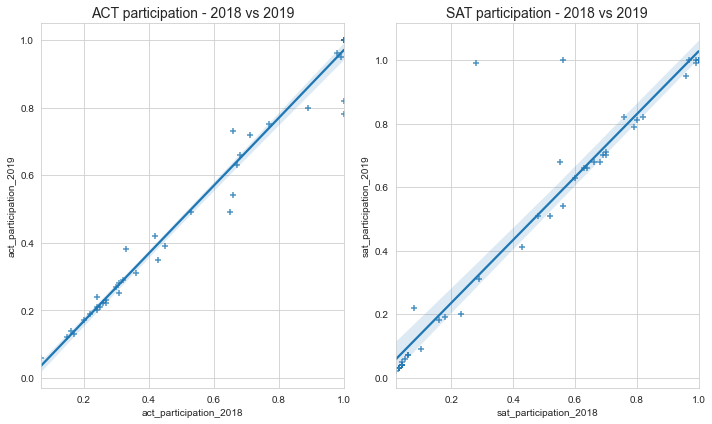

In [47]:
# Establish figure size.
plt.figure(figsize = (10,6))

# Plot for ACT 2018 vs 2019 participation
plt.subplot(1,2,1)
sns.regplot(x = 'act_participation_2018',y= 'act_participation_2019', data=final_df, marker = '+')
plt.title('ACT participation - 2018 vs 2019', fontsize = 14)

# Plot for SAT 2018 vs 2019 participation
plt.subplot(1,2,2)
sns.regplot(x = 'sat_participation_2018',y= 'sat_participation_2019', data=final_df, marker = '+')
plt.title('SAT participation - 2018 vs 2019', fontsize = 14)


plt.tight_layout()
plt.show()

#### 2 outliers found in SAT participation - 2018 vs 2019

In [55]:
# using Bokeh to visualise the outliers in SAT participation - 2018 vs 2019
TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(part_18,part_19)", "(@sat_participation_2018, @sat_participation_2019)"),
    ("state", "@state")]
)

p = figure(title="SAT participation", x_axis_label='sat_participation_2018', y_axis_label='sat_participation_2019', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('sat_participation_2018', 'sat_participation_2019', size=12, source=final_df)

show(p)

## Outside Research

---



#### Further information on state policies regarding SAT and ACT:

American College Testing (ACT) is a standardized exam that high school students take in college admission readiness in the US. High schools, colleges, universities, and education departments in states use the ACT scores in comparing students’ applications for admission.

ACT Inc. conducts the exam to evaluate the student’s readiness for college, while the College Board (the largest NPO in the US that helps navigate the transitioning from high school to college) conducts the SAT exam.

In 2010, the College Board introduced a program called `SAT School Day` that was meant to increase access to the SAT for low-income students by giving them free tests on weekdays and in their own schools. Although the program caught in a few places, the SAT was not as widely accepted as an assessment test because it's generally considered to test aptitude rather than knowledge. 

However, the redesigned SAT (released in 2016) that aims to overhaul the existing format to align the SAT with Common Core standards (i.e. a set of educational standards for American Schools, from kindergarten through 12th grade, designed to be consistent between each state and district), making it more appealing as an assessment test than its o lder version.

In addition, if there is a statewide testing required for all students in that state to take the SAT, the state foots the bill for its own administation of the exam, and students would not need to pay any fees to take the SAT. **In 2017-18, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) covered the cost of the SAT for all their public school students.**

We are specifically looking at these states that requires further research to explain the findings found during Exploratory Data Analysis:
- West Virginia
- South Carolina
- Maine
- New Hampshire

#### <u>West Virginia<u/>

West Virginia has the overall biggest movement in participation rates across SAT and ACT. It had a 71% increase in SAT participation rate and a 16% decrease in ACT participation rate.

This is largely due to the state, requiring all juniors to take SAT unless taking the West Virginia Alternative Summer Assessment. The first statewide SAT took place on Spring 2018.

West Virginia did not achieve 100% participation rate despite it being a requirement and free, could be due to the remaining 1% of students who did not take SAT opted to take the West Virginia Alternative Summer Assessment instead.

#### <u>South Carolina<u/>

South Carolina has a decreased in ACT participation rate by 22% from a 100% rate.

For students in South Carolina, they must take either the SAT or ACT, which tests they take might be determined by their school district as well.

This could be implied that the redesigned SAT in 2016 might have converted more school districts from ACT to SAT.


#### <u>Maine</u>

Maine requires all its 11th grade students to take the SAT and had SAT participation rates of 99% for both 2018 and 2019. 

It is unsure why the participation rate could not go from a 99% to a 100% in both years.


#### <u>New Hampshire</u>

New Hampshire requires all its 11th grade students to take the SAT and had SAT participation rates of 96% in 2018 and 95% in 2019. Which actually sights a 1% decrease y-o-y.

It is unsure why the participation rate could not go to a 100% in both years despite the SAT being a requirement. Furthermore, not only thte the participation rates not go up, it had actually decreased.

`Citations:`
- [Which states require the SAT?](https://blog.prepscholar.com/which-states-require-the-sat)
- [ACT Inc and College Board](https://www.number2.com/college-board-act/)
- [Benefits of SAT School Day](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about)
- [V.Wa high school juniors now required to take SAT exam](https://wvde.state.wv.us/news/3413/)
- [10 states covers cost of SAT for all students](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day)
- [SAT mandatory in Maine?](https://legislature.maine.gov/testimony/resources/EDU20210303@OPLA132601326855083564.pdf)

## Conclusions and Recommendations

---

Based on both the examination of data and research on state testing policies, a couple of trends, conclusions and recommendations could be derived:

<u>Key Trends</u>

In summary, these were the trends that we had observed:
* Participation rates and total mean score / composite have a strong negative correlation (i.e. the higher the participation rate for standadized tests, the lower the total score will be)
* Participation rates in SAT and that of ACT have a strong negative correlation (i.e. if students are taking one test, it is highly likely that they will not take the other standardized test)
* ACT composite scores in 2018 and that of 2019 have a strong positive correlation while SAT total scores in 2018 and that of 2019 have a strong positive correlation (i.e. test scores in totality remain largely similar between 2018 and 2019)
* Based on the boxplot drawn, there is minimal impact on median score for both SAT and ACT even if participant rates changes. (i.e. change in participant rates does not <u>drastically</u> impact college acceptance rates) This has also been reinforced by the trend that 2018 scores versus 2019 scores have a strong positive correlation.

<u>Conclusion and Recommendations</u>

As it is ultimately the decision of the state to make it a requirement for all its students to take either the SAT or ACT, the College Board could only do so much in encouraging students to opt for taking the SAT rather than ACT or local state tests. The College Board has been successful thus far in raising its SAT participation rates and in raising the number of states requiring student to take the SAT (from only 3 states in 2014-15 to 10 states in 2017-18 <sup>[(1)](https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day)</sup> ) through efforts such as the 'SAT School Day' in 2010 and redesigned SAT in 2016. It is only a matter of time until the SAT gains popularity and more states recognises the value making SAT a statewide test requirement. 

Hence, I would recommend focusing efforts on states that have already made SAT a requirement for all its students, especially these states: **West Virginia, Maine & New Hampshire.** 

For these states, <u>it is the case of stabilising the high participation rate as well as increasing participation rates to 100%.</u>

For **Maine and New Hampshire,** it could be that these few percentages of students do not see the value of sitting for the exam and would rather not go to college. Hence, the College Board could make more frequent visits to schools to educate students on the importance of taking a standardized test (in this case, the required test is SAT), the importance of getting a degree in college especially in this day and age, and also what college life awaits those who are able to make it to their preferred colleges. Sometimes, it may be the parents that finds no value in going to college and would rather their child not go to college and to begin working right after graduating high school. Hence, College Board could hold conferences and road shows for parents to share success stories of children graduating from colleges and why a college degree is more important now than ever before. The College Board could educate parents on all methods of financial assistance if parents have concerns on the cost of a degree.

For **West Virginia,** it could be that the 1% of students chose to take the West Virginia Alternative Summer Assessment instead of the SAT despite both tests being free. In this case, the College Board could hold talks and provide brochures on comparisons between an globally recognised test and a local state test. Also, they can educate the students on why holding a transcript for a globally recognised test could benefit them in the long run, for example, local state test would more likely be phased out in the coming years and when applying to colleges outside of the United States, having a more recognised transcript could be a better gauge during the college application stage.


In addition, if there are extra resources, the College Board should also focus on **South Carolina**. Since, more schools in the state are shifting away from the ACT test requirement, the College Board could potentially expand the SAT School Day partnership to South Carolina or to reduce the SAT fees further to encourage the state to adopt statewide SAT testing and encourage students to choose the SAT over other tests. Although there is a negative correlation between participation rates and total mean score. Based on other trend observations above, this increase would only minimally impact overall college acceptance rates. Hence, there would be no need for any concern when increasing participation rates.